# Lab 02 - Titanic

The RMS Titanic is an infamous passenger ship which was built in 1912 and sank on its maiden voyage. A number of passengers survived its sinking; however, the probability of survival depended on the fare paid by the passenger.

In this lab, your task is to show the relationship between the fare paid and survival from the ship’s sinking. This lab tests your ability to import and manipulate data and to display it using a graphing tool.

### Data
Kaggle (​https://www.kaggle.com/c/titanic/data​)

Assume data is in the ```./titanic.csv```

### Tips
- Read the data, which you may assume is in the same directory as the notebook / script.
- Show that you have inspected the data to determine fields.
- Show the difference in survival rates based on fare paid using a graph.

### Notes
To install unfounded module
```
pip3 install <module_name> --user
``` 


--------------

# 1. Read and inspect the data

In [161]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 1.1 Read data from './titanic.csv'

In [162]:
df = pd.read_csv('titanic.csv')
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [164]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [165]:
passenger_num = len(df)
passenger_num

891

In [166]:
df.Fare.mean()

32.204207968574636

In [167]:
survived_df = df[df['Survived'] == 1]
not_survived_df = df[df['Survived'] == 0]
print("Survived:", len(survived_df), "; Not survived:", len(not_survived_df))

Survived: 342 ; Not survived: 549


# 2. Dig into the data, find the relationship between Survival Rates and Fare

## 2.1 Solution
1. Sort the dataframe by the order of the 'Fare'
2. Split the dataframe into n partitions called sub-dataframe, each sub-dataframe has the same amount of value.
3. Draw graphs to show how the survived rates change at different fares levels.

### 2.1.1 Sort the dataframe by the order of the 'Fare'

In [168]:
sorted_pd = df.sort_values(by = "Fare", inplace = False)
sorted_pd.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S


### 2.1.2 Split the dataframe into n partitions

In [169]:
sub_df = {}
n = 5
m = int(passenger_num/n)
# for i in range(n):
#     print(i)
sub_df[0] = sorted_pd.iloc[:m]
sub_df[1] = sorted_pd.iloc[m:2*m]
sub_df[2] = sorted_pd.iloc[2*m:3*m]
sub_df[3] = sorted_pd.iloc[3*m:4*m]
sub_df[4] = sorted_pd.iloc[4*m:]

len(sub_df[0])
len(sub_df[4])

179

### 2.1.3 Draw graphs

#### 2.1.3.1 Swarmplot

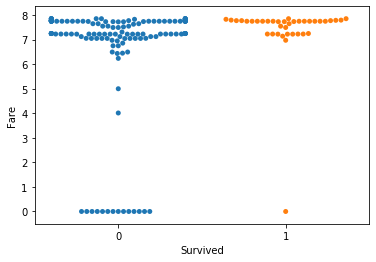

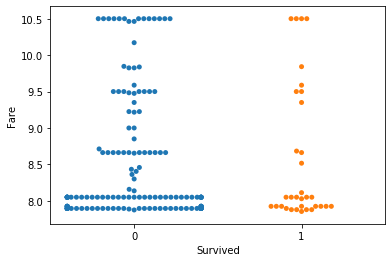

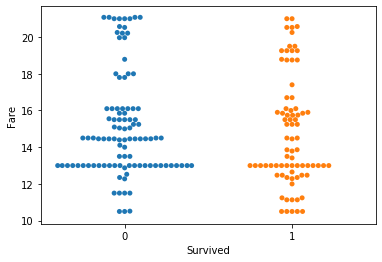

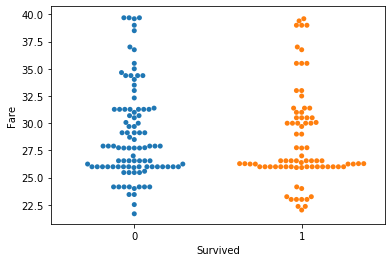

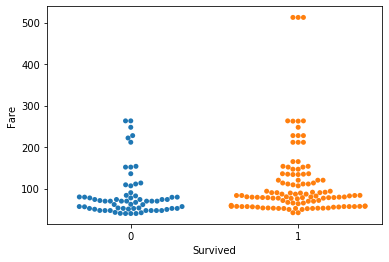

In [170]:
for i in range(len(sub_df)):
    plt.figure()
#     sns.stripplot(x = sub_df[i].Survived, y = sub_df[i].Fare, data = sub_df[i])
    sns.swarmplot(x = sub_df[i].Survived, y = sub_df[i].Fare, data = sub_df[i])

#### 2.1.3.2 Pie chart & Countplot

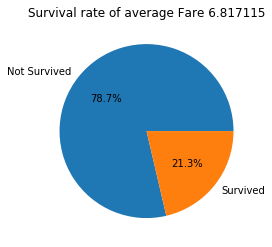

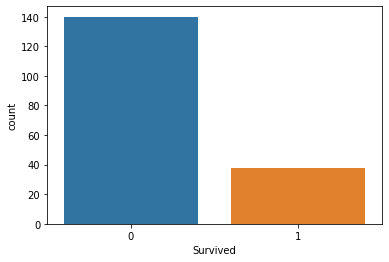

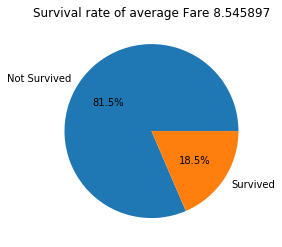

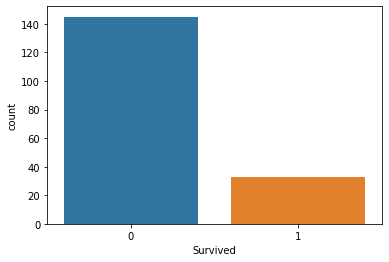

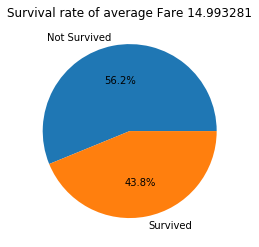

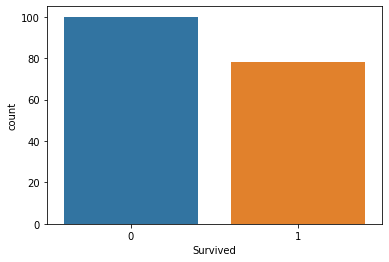

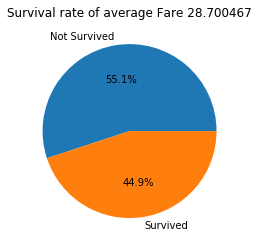

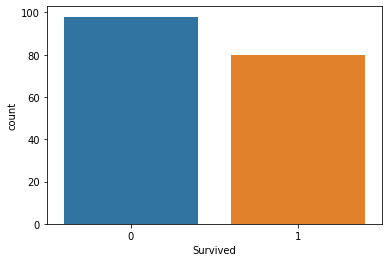

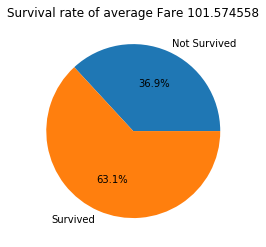

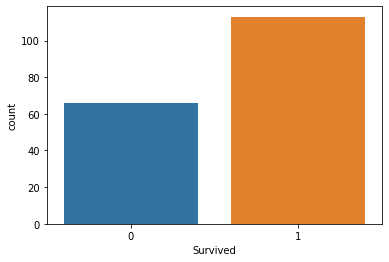

In [171]:
for i in range(len(sub_df)):
    survived_in_sub_df = sub_df[i]['Survived'].sum()
    not_survived_in_sub_df = len(sub_df[i]) - survived_in_sub_df
    
    # Pie chart
    plt.figure()
    plt.pie([not_survived_in_sub_df, survived_in_sub_df], labels = ['Not Survived','Survived'], autopct='%0.1f%%')
    plt.title("Survival rate of average Fare %f" %sub_df[i].Fare.mean())

    # Bar chart
    plt.figure()
    sns.countplot(x = sub_df[i].Survived, data = sub_df[i])


## 2.2 Conclusion

I choose to split all the dataset into 5 partitions so that each partition could have 178 data(while the last partition have 179)

According to the swarm plot(in 2.1.3.1), we may not be able to see what the survived rate changes in one single graph, however, we could get a sense that with the fare goes up, the orange dots become more.

When we check the pie chart, the result is obvious. The survived rate changes from 21.3%(with lowest fare level) to 63.1%(with the highest fare level). The conclusion is while the passenger pays more money, the survived rate would be higher, which is SO ironic.